In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Load dependencies

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
tic_tac_toe_endgame = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
X = tic_tac_toe_endgame.data.features 
y = tic_tac_toe_endgame.data.targets 
  
# metadata 
print(tic_tac_toe_endgame.metadata) 
  
# variable information 
print(tic_tac_toe_endgame.variables) 


{'uci_id': 101, 'name': 'Tic-Tac-Toe Endgame', 'repository_url': 'https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame', 'data_url': 'https://archive.ics.uci.edu/static/public/101/data.csv', 'abstract': 'Binary classification task on possible configurations of tic-tac-toe game', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 958, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Mon Aug 19 1991', 'dataset_doi': '10.24432/C5688J', 'creators': ['David Aha'], 'intro_paper': None, 'additional_info': {'summary': 'This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first.  The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three

### Data Exploration

In [4]:
frames = [X, y]
dataset = pd.concat(frames, axis=1)

dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [5]:
from sklearn.preprocessing import LabelEncoder

col_names = dataset.columns.values
for i in col_names:
    le = LabelEncoder()
    dataset[i] = le.fit_transform(dataset[i])

dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   top-left-square       958 non-null    int32
 1   top-middle-square     958 non-null    int32
 2   top-right-square      958 non-null    int32
 3   middle-left-square    958 non-null    int32
 4   middle-middle-square  958 non-null    int32
 5   middle-right-square   958 non-null    int32
 6   bottom-left-square    958 non-null    int32
 7   bottom-middle-square  958 non-null    int32
 8   bottom-right-square   958 non-null    int32
 9   class                 958 non-null    int32
dtypes: int32(10)
memory usage: 37.6 KB


In [7]:
dataset.describe()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,1.222338,1.133612,1.222338,1.133612,1.311065,1.133612,1.222338,1.133612,1.222338,0.653445
std,0.775569,0.798966,0.775569,0.798966,0.740882,0.798966,0.775569,0.798966,0.775569,0.476121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


### Data Cleaning

In [8]:
dataset.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
class                   0
dtype: int64

In [9]:
new_dataset = dataset.dropna()
new_dataset.shape
new_dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


### Data Validation

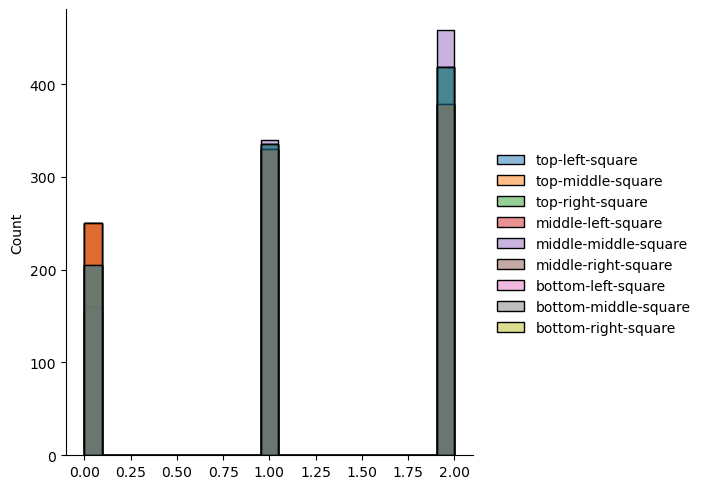

In [10]:
sns.displot(new_dataset.iloc[:, :-1])

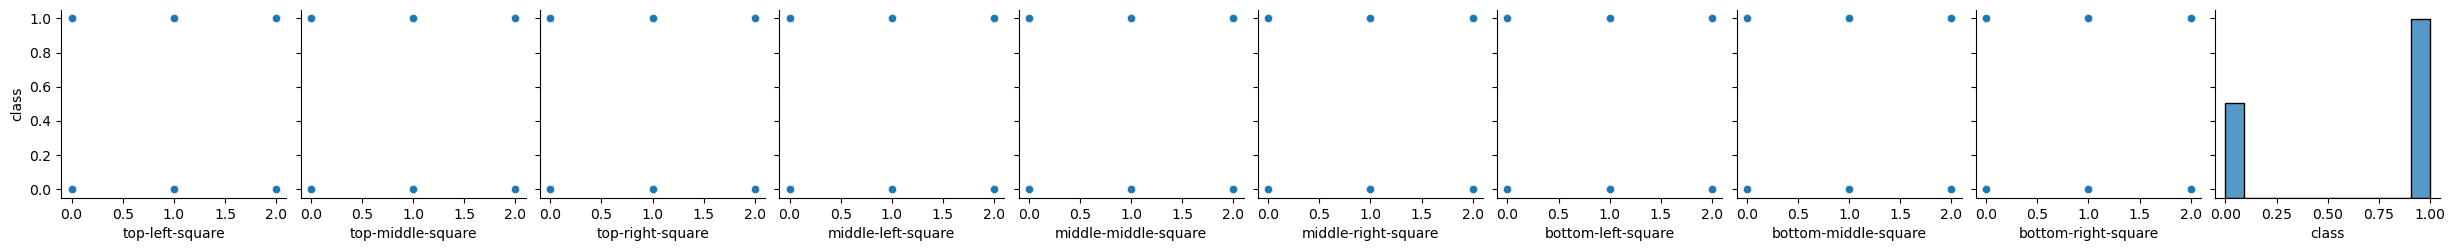

In [11]:
sns.pairplot(new_dataset, y_vars=['class'])

### Split Features and Target

In [12]:
X = new_dataset.iloc[:, :-1]
y = new_dataset.iloc[:, -1]

### Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = X.columns.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(col_names)

['top-left-square' 'top-middle-square' 'top-right-square'
 'middle-left-square' 'middle-middle-square' 'middle-right-square'
 'bottom-left-square' 'bottom-middle-square' 'bottom-right-square']


### Split Train and Test Dataset

In [14]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=True)

X_train.head()

X_train.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

### Initialize Classification Model

In [15]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

ada = AdaBoostClassifier(algorithm="SAMME")
ada.fit(X_train, y_train)

svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)


SVC(probability=True)

### Test Model

In [16]:
knn_test_pred = knn.predict(X_test)
knn_test_prob = knn.predict_proba(X_test)[:, 1]
knn_train_pred = knn.predict(X_train)

ada_test_pred = ada.predict(X_test)
ada_test_prob = ada.predict_proba(X_test)[:, 1]
ada_train_pred = ada.predict(X_train)

svm_test_pred = svm.predict(X_test)
svm_test_prob = svm.predict_proba(X_test)[:, 1]
svm_train_pred = svm.predict(X_train)

### Model Evaluation

#### Confusion Matrix

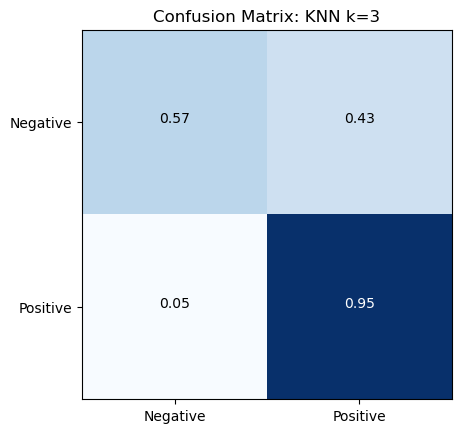

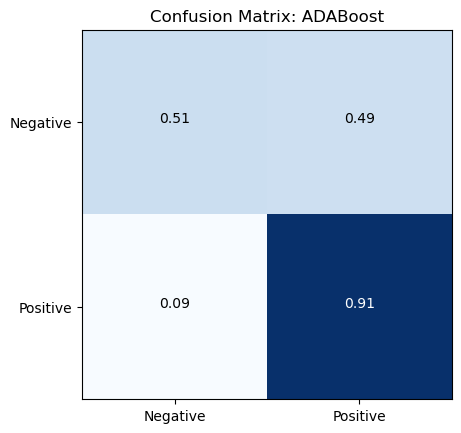

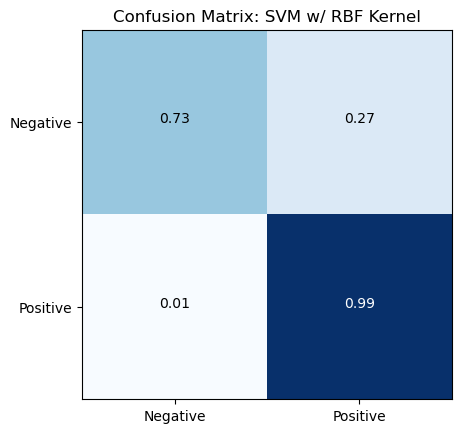

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, knn_test_pred)

plt.title("Confusion Matrix: KNN")
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.title("Confusion Matrix: KNN k=3")
plt.show()

conf_matrix = confusion_matrix(y_test, ada_test_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.title("Confusion Matrix: ADABoost")
plt.show()

conf_matrix = confusion_matrix(y_test, svm_test_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.title("Confusion Matrix: SVM w/ RBF Kernel")
plt.show()

#### Precision - Recall Curve

In [18]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, knn_test_pred)
print("Classification Report: KNN",)
print (report)
accuracy = accuracy_score(y_train,knn_train_pred)
print("Train Accuracy:", accuracy)
accuracy = accuracy_score(y_test,knn_test_pred)
print("Test Accuracy:", accuracy)

report = classification_report(y_test, ada_test_pred)
print("Classification Report: ADABoost",)
print (report)
accuracy = accuracy_score(y_train,ada_train_pred)
print("Train Accuracy:", accuracy)
accuracy = accuracy_score(y_test,ada_test_pred)
print("Test Accuracy:", accuracy)

report = classification_report(y_test,svm_test_pred)
print("Classification Report: SVM w/ RBF Kernel",)
print (report)
accuracy = accuracy_score(y_train,svm_train_pred)
print("Train Accuracy:", accuracy)
accuracy = accuracy_score(y_test,svm_test_pred)
print("Test Accuracy:", accuracy)

Classification Report: KNN
              precision    recall  f1-score   support

           0       0.86      0.57      0.68        67
           1       0.80      0.95      0.87       125

    accuracy                           0.82       192
   macro avg       0.83      0.76      0.78       192
weighted avg       0.82      0.82      0.81       192

Train Accuracy: 0.8420365535248042
Test Accuracy: 0.8177083333333334
Classification Report: ADABoost
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        67
           1       0.78      0.91      0.84       125

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.77      0.76       192

Train Accuracy: 0.7323759791122716
Test Accuracy: 0.7708333333333334
Classification Report: SVM w/ RBF Kernel
              precision    recall  f1-score   support

           0       0.98      0.73      0.84        67

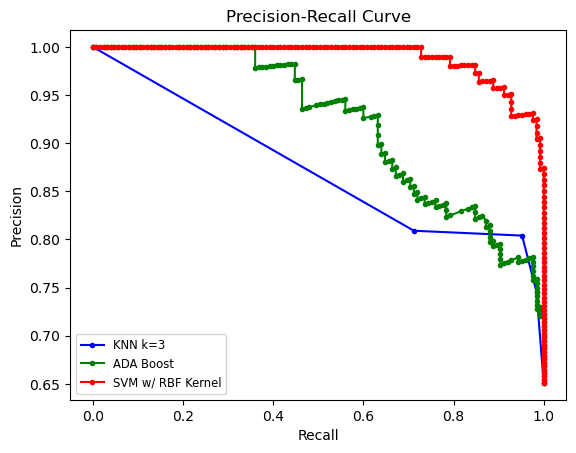

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, knn_test_prob)
plt.plot(recall, precision, marker='.', color='b', label="KNN k=3")
precision, recall, _ = precision_recall_curve(y_test, ada_test_prob)
plt.plot(recall, precision, marker='.', color='g', label="ADA Boost")
precision, recall, _ = precision_recall_curve(y_test, svm_test_prob)
plt.plot(recall, precision, marker='.', color='r', label="SVM w/ RBF Kernel")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best", fontsize='small')
plt.show()



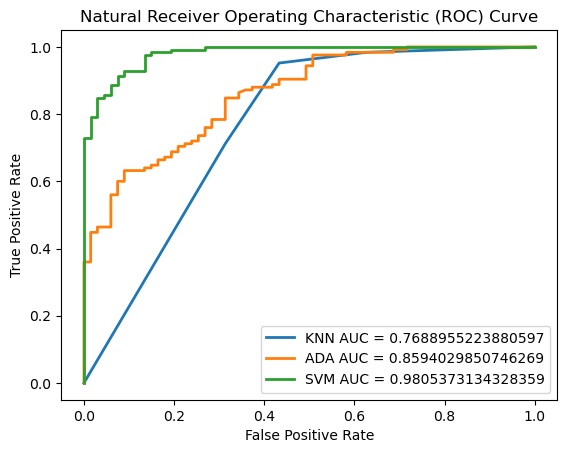

In [20]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

fpr, tpr, _ = roc_curve(y_test, knn_test_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f"KNN AUC = {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, ada_test_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f"ADA AUC = {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, svm_test_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f"SVM AUC = {roc_auc}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Natural Receiver Operating Characteristic (ROC) Curve')
plt.legend()
